In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import datetime
import math
import gmplot
from functions import *
from IPython.display import IFrame
import warnings
warnings.filterwarnings('ignore')

In [2]:
#https://www.kaggle.com/michaelfumery/e-commerce-cleaning-and-eda

In [3]:
def missing_presence(df, figsize):
    
    # Affichage de la forme du dataset
    print("Le dataset contient {} lignes et {} colonnes.".format(df.shape[0], df.shape[1]))
    
    # Proportion de valeurs nulles
    prop_nan_df = df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100
    print('Il y a {:.2f}% de NaN.'.format(prop_nan_df))
    
    # Visualisation des valeurs non nulles
    df_null=(df.notnull().sum()/df.shape[0]).sort_values(ascending=False)*100
    
    # Création de la figure
    plt.figure(figsize=figsize)
    plt.style.use('ggplot')
    ax=sns.barplot(x=df_null.values, y=df_null.index, orient='h')
    plt.title('Proportion de valeurs présentes par colonne')
    plt.xticks(rotation=0)
    plt.yticks(fontsize=14)
    plt.ylabel("Nom de la colonne")
    plt.xlabel('Pourcentage de valeurs présentes (%)')

    # Affichage de la valeur à côté des barres
    for index, value in enumerate(df_null.values):
        plt.text(value, index+0.4, str(value.round(2)))

    plt.show()
    
    
def select_col_by_type(df,col_type) : 
    var_object = []
    for col in df.select_dtypes(col_type) :
        var_object.append(col)
    return var_object


# Début de programme

In [4]:
data_path = '../POLIST_kakpo_fiacre/data/'

### Table Clients

In [5]:
customers = pd.read_csv(data_path + "olist_customers_dataset.csv", sep=',')

In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Géolocation 

In [8]:
geolocation = pd.read_csv(data_path +'olist_geolocation_dataset.csv', sep=',')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [10]:
# La table Geolocation compte plus d'un million de lignes et pas de valeurs nulles. 
# Cette table est liée à la table clients grâce à la clé geolocation_zip_code_prefix. 
# Regardons la description du fichier pour avoir un aperçu des étendues de Latitudes et Longitudes:

### Entête de commande

In [11]:
orders = pd.read_csv(data_path +'olist_orders_dataset.csv', sep=',')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
# Cette table regroupe les entêtes de commandes, identifiées par un order_id unique 
# et rattaché à un client par le customer_id

### Les lignes de commande

In [14]:
order_items = pd.read_csv(data_path + 'olist_order_items_dataset.csv', sep=',')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### Paiement des commandes

In [16]:
order_payments = pd.read_csv(data_path + 'olist_order_payments_dataset.csv', sep=',')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [17]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### Commentaires sur les commandes

In [18]:
order_reviews= pd.read_csv(data_path + 'olist_order_reviews_dataset.csv', sep=',')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [19]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### Table Produit

In [20]:
products = pd.read_csv(data_path + 'olist_products_dataset.csv', sep=',')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [21]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### Table Vendeur ou Boutiquier

In [22]:
sellers = pd.read_csv(data_path + 'olist_sellers_dataset.csv', sep=',')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [23]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Table catégorie des produits

In [24]:
category = pd.read_csv(data_path + 'product_category_name_translation.csv', sep=',')
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [25]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Fusion des tables 

### Jointure des tables Produit et Catégorie

In [26]:
products_cat = pd.merge(products, category,
                    how="left",
                    on="product_category_name")

del_features_list = ["product_category_name", "product_weight_g",
                     "product_length_cm", "product_height_cm",
                     "product_width_cm"]
products_cat.drop(del_features_list, axis=1, inplace=True)
products_cat = products_cat.rename(columns={"product_category_name_english":
                                    "product_category_name"})
products_cat.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,housewares


Text(0, 0.5, 'Nombre de produits')

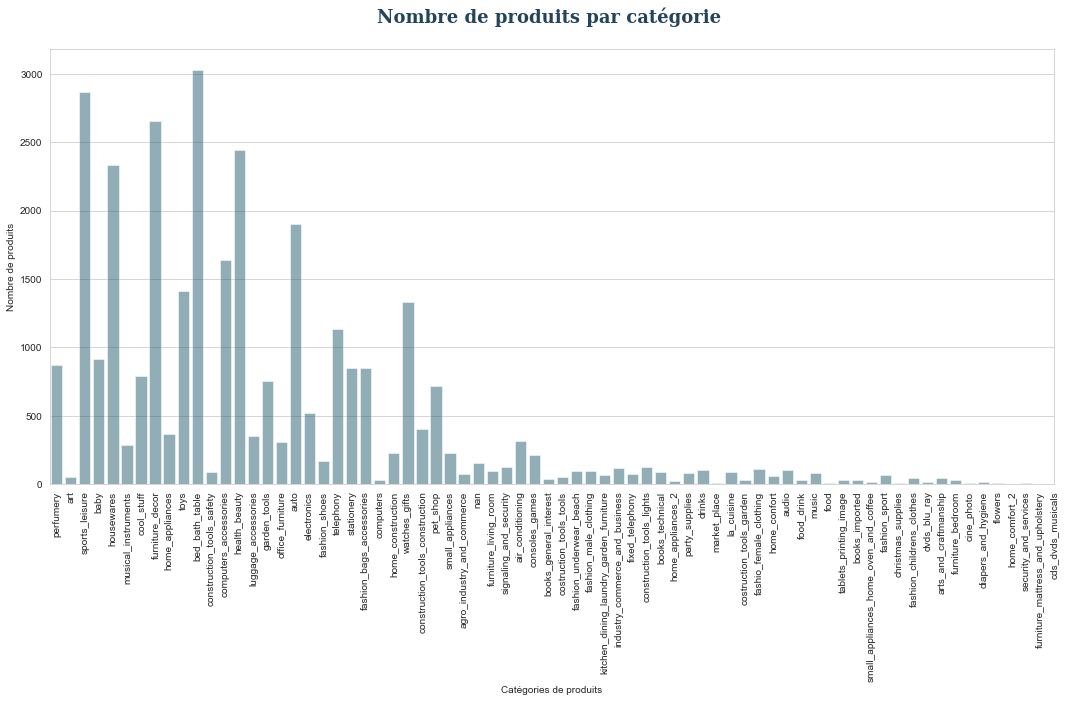

In [27]:
# Plot categories count in dataset
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#24445C",
              "weight": "bold",
              "size": 18}

fig = plt.figure(figsize=(18, 8))
sns.countplot(data=products_cat, x="product_category_name",
              edgecolor="white",
              color="#17657D", alpha=0.5)
plt.xticks(range(0, products_cat["product_category_name"].nunique()+1),
           products_cat["product_category_name"].unique(),
           rotation=90)
plt.title(f"Nombre de produits par catégorie \n",fontdict=font_title)
plt.xlabel(f"Catégories de produits")
plt.ylabel(f"Nombre de produits")

### Jointure de entêtes et les lignes de commande 

In [28]:
orders_table = pd.merge(order_items, orders,
                       how="left",
                       on="order_id")

del_features_list = ["seller_id", "shipping_limit_date",
                     "order_approved_at",
                     "order_delivered_carrier_date",
                     "order_estimated_delivery_date"]
orders_table.drop(del_features_list,
                 axis=1,
                 inplace=True)
orders_table.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31


In [29]:
orders_table["order_status"].value_counts(normalize=True)

delivered      0.978225
shipped        0.010519
canceled       0.004811
invoiced       0.003187
processing     0.003169
unavailable    0.000062
approved       0.000027
Name: order_status, dtype: float64

In [30]:
### Nous gardons les commandes déjà finalisée (livrée)
### Non seulement elles sont les plus pertinentes, mais aussi elles sont largement plus importantes 

In [31]:
orders_table = orders_table[orders_table["order_status"] == "delivered"]

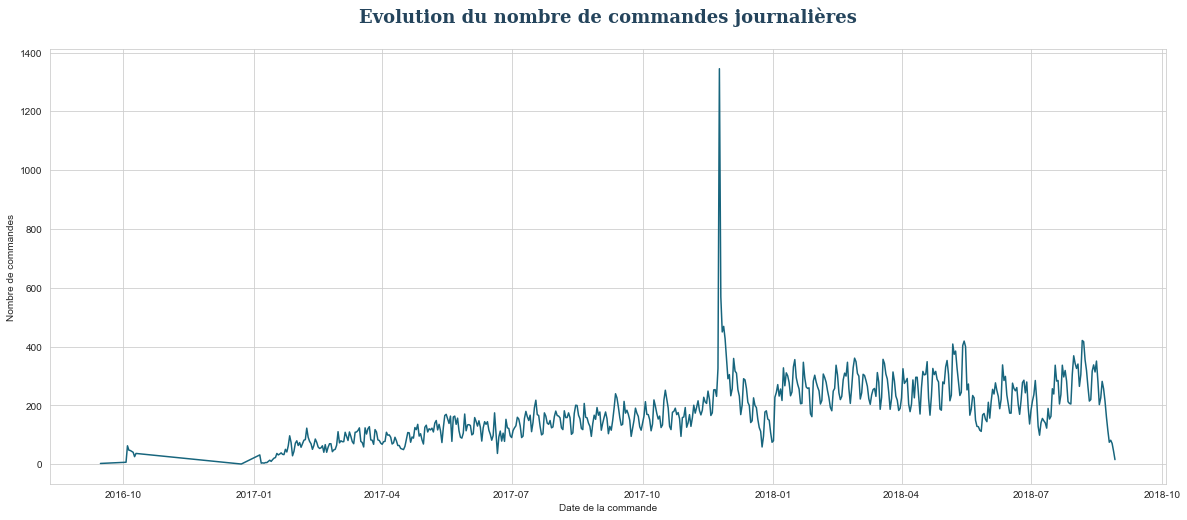

In [32]:
orders_per_days = orders_table.groupby(orders_table["order_purchase_timestamp"].astype(
    'datetime64[ns]').dt.date).count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot(color="#17657D")
ax.set_ylabel("count")
plt.title(f"Evolution du nombre de commandes journalières\n",
          fontdict=font_title)
plt.xlabel(f"Date de la commande")
plt.ylabel(f"Nombre de commandes")
plt.show()

In [33]:
### Formattage des dates

In [34]:
datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_cols:
    orders_table[col] = orders_table[col].astype('datetime64[ns]')
orders_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 8.4+ MB


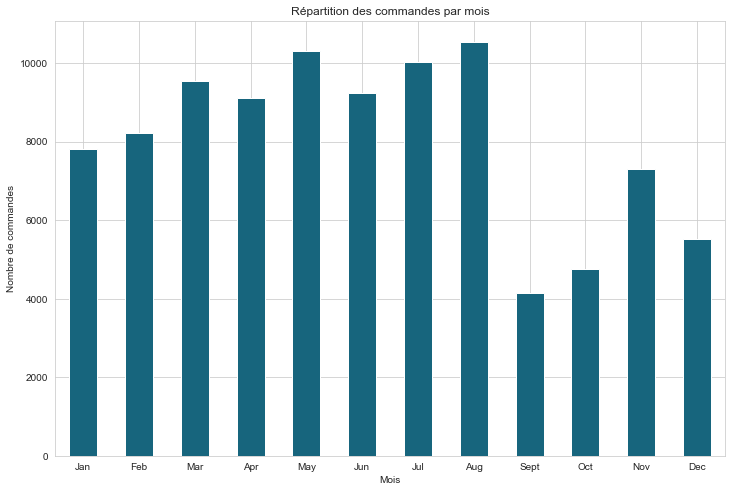

In [35]:
orders_table.groupby(orders_table['order_purchase_timestamp'].dt.month).agg({"order_id": "nunique"}).plot(
    figsize=(12, 8), kind="bar",
    title="Répartition des commandes par mois",
    color="#17657D",
    legend = False
)
plt.xticks(np.arange(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                              'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
           rotation='horizontal')
plt.xlabel(f"Mois")
plt.ylabel(f"Nombre de commandes")
plt.show()

### Repartition des commandes par jour de la semaine

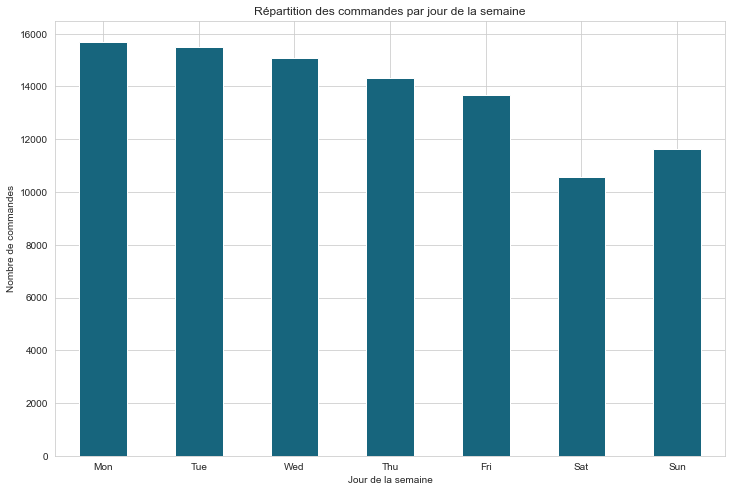

In [36]:
orders_table.groupby(orders_table['order_purchase_timestamp'].dt.dayofweek)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par jour de la semaine",
          color="#17657D",
          legend=False)
plt.xticks(np.arange(0,7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation='horizontal')
plt.xlabel(f"Jour de la semaine")
plt.ylabel(f"Nombre de commandes")
plt.show()


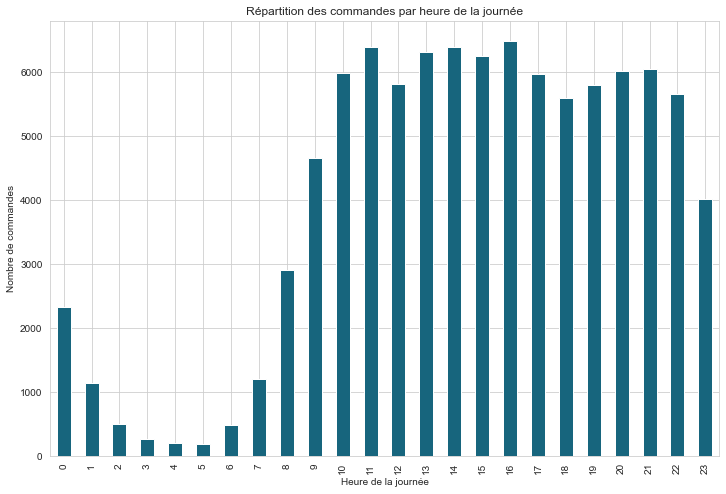

In [37]:
orders_table.groupby(orders_table['order_purchase_timestamp'].dt.hour)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par heure de la journée",
          color="#17657D",
          legend=False)
plt.xlabel(f"Heure de la journée")
plt.ylabel(f"Nombre de commandes")
plt.show()


In [38]:
# On remarque les plus gros écart sur les données mensuelles. 
# Vérifions les variances de chiffre d'affaire sur les mois de l'années

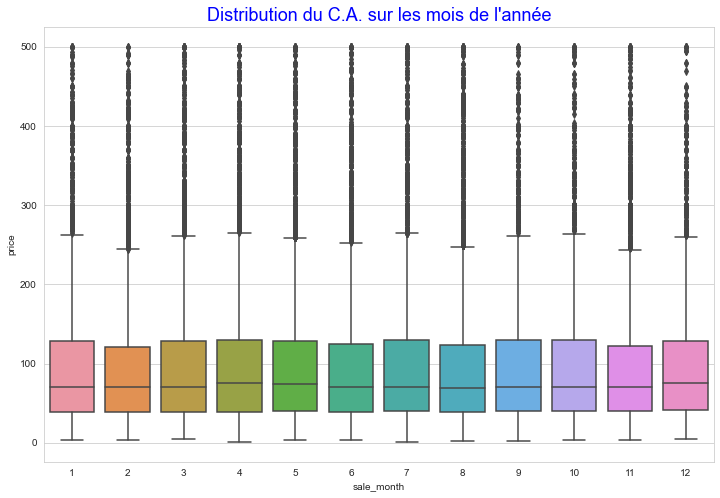

In [39]:
orders_table["sale_month"] = orders_table['order_purchase_timestamp'].dt.month
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=orders_table[orders_table.price < 500], x="sale_month", y="price")
plt.title("Distribution du C.A. sur les mois de l'année", fontsize=18, color="b")
plt.show()

### Jointure avec la table paiement

In [40]:
# Pour le dataset des paiements, vous allons créer de nouvelles variables à savoir :
# Le nombre de moyens de paiement différents utilisés sur la commande.
# Le nombre d'échéances totales de la commande.

In [41]:
group_payments = order_payments.groupby(by="order_id").agg(
    {"payment_sequential": 'count',
     "payment_installments": 'sum'})

orders_table = pd.merge(orders_table, group_payments,
                       how="left",
                       on="order_id")
orders_table = orders_table.rename(columns={
    "payment_sequential": "nb_payment_sequential",
    "payment_installments": "sum_payment_installments"})
orders_table.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0


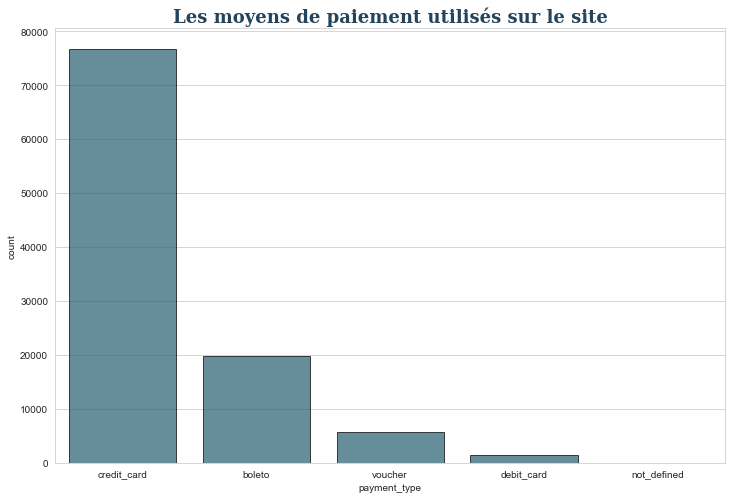

In [42]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=order_payments, x="payment_type",
              edgecolor="black",
              color="#17657D", alpha=0.7)
plt.title(f"Les moyens de paiement utilisés sur le site",
          fontdict=font_title)
plt.show()

### Jointure avec les commentaires Client

In [43]:
group_reviews = order_reviews.groupby("order_id").agg({
    "review_id": "count",
    "review_score": "mean",
    #'review_comment_message': 'first',
    #'review_comment_title': 'first'
})

orders_table = pd.merge(orders_table, group_reviews,
                        how="left",
                        on="order_id")
orders_table = orders_table.rename(columns={
    "review_id": "is_reviewed"})
#orders_table = orders_table.drop(["is_review_y", "review_score_y"], axis = O)
orders_table.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,1,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,1,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,1,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,1,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,1,5.0


In [44]:
orders_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
 9   sale_month                     110197 non-null  int64         
 10  nb_payment_sequential          110194 non-null  float64       
 11  

In [45]:
# Pour les avis clients, nous allons également créer une nouvelle variable
# qui indiquera seulement si oui ou non la commande a été notée (True or False) 
# et une seconde variable qui reprendra la note attribuée.

In [46]:
orders_table["is_reviewed"] = np.where(orders_table["is_reviewed"] == 1,
                                       True, False)

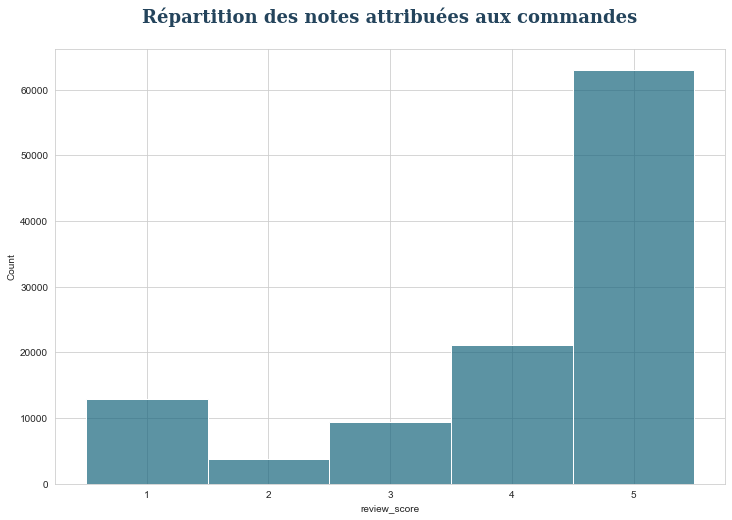

In [47]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=orders_table, x="review_score", 
             discrete=True,
             edgecolor="white",
             color="#17657D", alpha=0.7)
plt.title(f"Répartition des notes attribuées aux commandes\n",
          fontdict=font_title)
plt.show()

### Jointure avec la table client

In [48]:
orders_table = pd.merge(orders_table, customers,
                       how="left",
                       on="customer_id")
orders_table.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,True,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,True,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,True,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,True,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,True,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


### Jointure avec les catégories/Produits

In [49]:
data = pd.merge(orders_table, products_cat,
               how="left",
               on="product_id")
data.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,...,is_reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,...,True,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,58.0,598.0,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,...,True,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,56.0,239.0,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,...,True,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,59.0,695.0,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,...,True,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,42.0,480.0,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,...,True,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59.0,409.0,1.0,garden_tools


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
 9   sale_month                     110197 non-null  int64         
 10  nb_payment_sequential          110194 non-null  float64       
 11  

## Feature engineering en fonction du client¶

In [51]:
#https://www.statista.com/statistics/294232/most-popular-retail-e-commerce-categories-in-brazil/
#https://www.statista.com/statistics/311406/us-online-shopping-categories-gender/

In [52]:
# Maintenant que nous avons notre dataset étendu,
# nous allons centrer les données obtenues sur le client 
# et non sur les commandes en créant de nouvelles variables. 
# Comme nous l'avons vu précédement,
# l'identifiant unique du client est contenu dans la variable customer_unique_id.

# Commençons par créer une variable contenant le délai le livraison de chaque commande 
# (et suppression de la variable order_delivered_customer_date) :
#real_delivery_delay

In [53]:
data["real_delivery_delay"] = (data.order_delivered_customer_date
                           - data.order_purchase_timestamp).dt.round('1d').dt.days
data.drop("order_delivered_customer_date", axis=1, inplace=True)

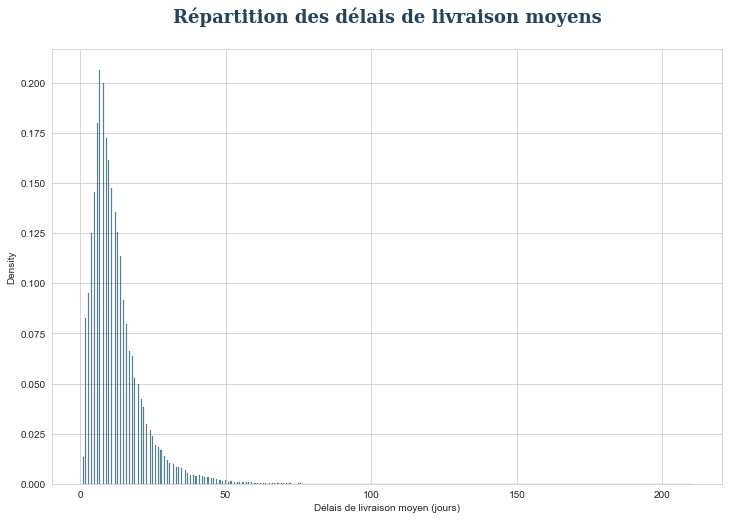

In [54]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=data, x="real_delivery_delay",
             stat="density",
             edgecolor="black",
             color="#17657D", alpha=0.7)
plt.xlabel("Délais de livraison moyen (jours)")
plt.title(f"Répartition des délais de livraison moyens\n",
          fontdict=font_title)
plt.show()


In [55]:
data['product_category'] = np.where((data['product_category_name'].str.contains("fashio|luggage") == True),
                                    'fashion_clothing_accessories',
                                    np.where((data['product_category_name'].str.contains("health|beauty|perfum") == True),
                                             'health_beauty',
                                             np.where((data['product_category_name'].str.contains("toy|baby|diaper") == True),
                                                      'toys_baby',
                                                      np.where((data['product_category_name'].str.contains("book|cd|dvd|media") == True),
                                                               'books_cds_media',
                                                               np.where((data['product_category_name'].str.contains("grocer|food|drink") == True),
                                                                        'groceries_food_drink',
                                                                        np.where((data['product_category_name'].str.contains("phon|compu|tablet|electro|consol") == True),
                                                                                 'technology',
                                                                                 np.where((data['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc") == True),
                                                                                          'home_furniture',
                                                                                          np.where((data['product_category_name'].str.contains("flow|gift|stuff") == True),
                                                                                                   'flowers_gifts',
                                                                                                   np.where((data['product_category_name'].str.contains("sport") == True),
                                                                                                            'sport',
                                                                                                            'other')))))))))

In [56]:
# drop product_category_name column
data.drop("product_category_name", axis=1, inplace=True)

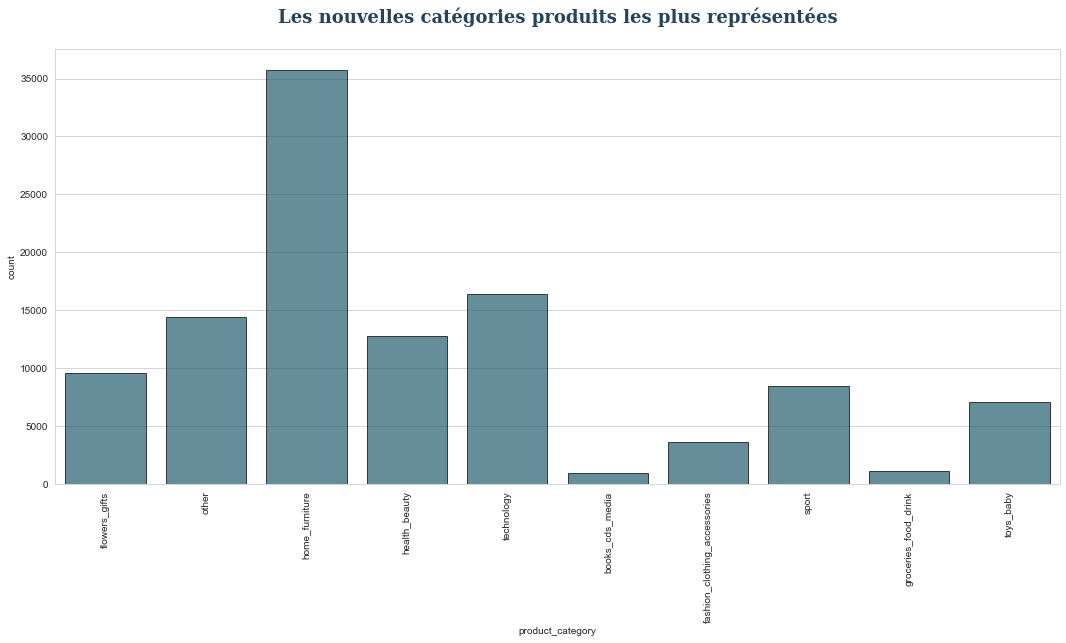

In [57]:
# Plot categories count in dataset
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=data, x="product_category",
              edgecolor="black",
              color="#17657D", alpha=0.7)
plt.xticks(range(0, data["product_category"].nunique()),
           data["product_category"].unique(),
           rotation=90)
plt.title(f"Les nouvelles catégories produits les plus représentées\n",
          fontdict=font_title)
plt.show()

In [58]:
# Commande par client

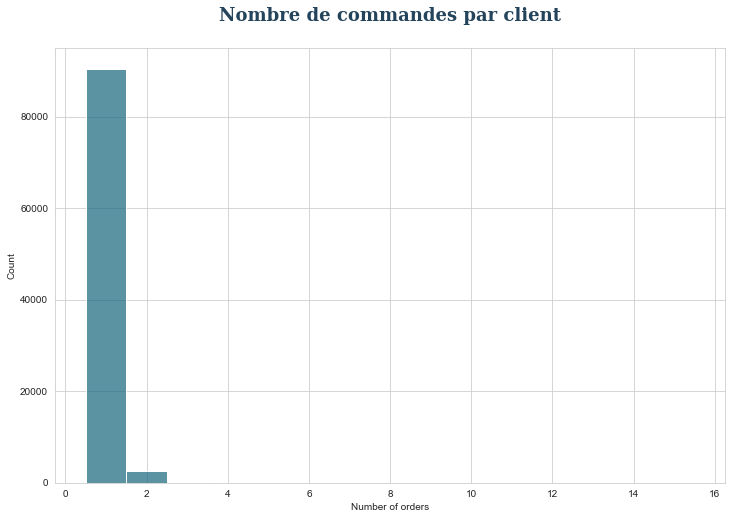

In [59]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data.groupby("customer_unique_id").agg({"order_id": "nunique"}),
             x="order_id",
             discrete=True,
             edgecolor="white",
             color="#17657D", alpha=0.7)
plt.xlabel("Number of orders")
plt.title(f"Nombre de commandes par client\n",
          fontdict=font_title)
plt.show()

In [60]:
# La majeure partie des clients n'ont passé qu'une seule commande. 
# Il sera donc compliqué d'établir un classement de leur catégorie produit préférée.
# Nous allons donc créer une variable par catégorie produit pour y dispatcher 
# le nombre de produits achetés sur les commandes passées.
# Ensuite, nous calculerons le ratio du nombre de produits par catégorie sur 
# le nombre de produits total acheté par le client.

In [61]:
categories_customers = data.groupby(["customer_unique_id", "product_category"]).agg({"order_item_id": "count"}).unstack()
categories_customers.columns = categories_customers.columns.droplevel(0)
categories_customers.fillna(0, inplace=True)
categories_customers["total_items"] = categories_customers.sum(axis=1)

# ratio of total items
for col in categories_customers.columns:
    if (col != "total_items"):
        categories_customers[col] = (categories_customers[col]/categories_customers["total_items"])

categories_customers.reset_index(inplace=True)
categories_customers.head(30)

product_category,customer_unique_id,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0004bd2a26a76fe21f786e4fbd80607f,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,00050ab1314c0e55a6ca13cf7181fecf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,00053a61a98854899e70ed204dd4bafe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
8,0005e1862207bf6ccc02e4228effd9a0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0005ef4cd20d2893f0d9fbd94d3c0d97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [62]:
#Nous allons ensuite calculer le nombre moyen d'articles par commande pour chaque client :

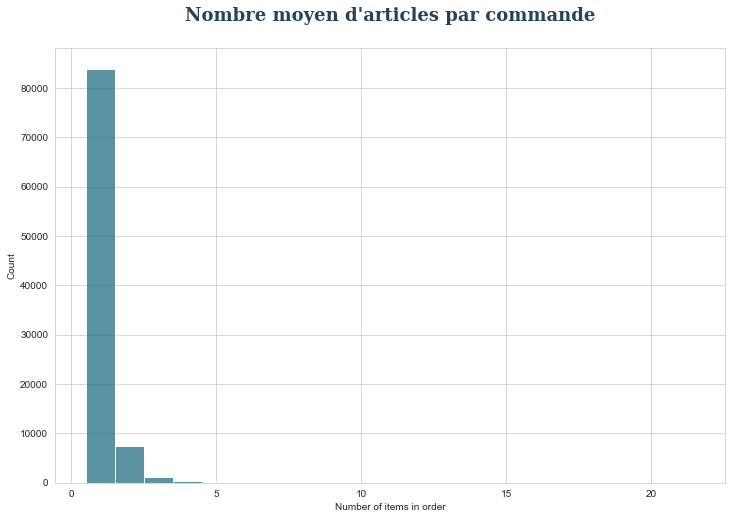

In [63]:
products_per_order = data.groupby(["customer_unique_id", "order_id"])\
                        .agg({"order_item_id": "count"})
products_per_order = products_per_order.groupby("customer_unique_id")\
                        .agg({"order_item_id": "mean"})

# Plot density of number items in order
fig = plt.figure(figsize=(12, 8))
sns.histplot(data = products_per_order,
             x="order_item_id",
             discrete=True,
             edgecolor="white",
             color="#17657D", alpha=0.7)
plt.xlabel("Number of items in order")
plt.title(f"Nombre moyen d'articles par commande\n",
          fontdict=font_title)
plt.show()

In [64]:
# A présent, nous allons calculer le nombre de jours écoulés entre la première et la dernière commande. 
# Nous ramènerons ensuite ce délai au nombre de commande du client.

In [65]:
recurencies = data.groupby("customer_unique_id").agg({"order_purchase_timestamp": ["min","max"]})
recurencies.columns = recurencies.columns.droplevel(0)
# Max date in dataset
max_date = data["order_purchase_timestamp"].max()

# Delay from the last order
recurencies["order_total_delay"] = [(y[1] - y[0]).round('1d').days if y[1] != y[0] 
                                    else (max_date - y[0]).round('1d').days 
                                    for x,y in recurencies.iterrows()]
recurencies.drop(["min", "max"], axis=1, inplace=True)
recurencies.head(3)

,order_total_delay
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,537


In [66]:
#Création du dataset clients :

In [67]:
cust_data = data.groupby("customer_unique_id").agg({"order_id": "nunique",
                                                    "price": "sum",
                                                    "freight_value": "sum",
                                                    "nb_payment_sequential": "mean",
                                                    "sum_payment_installments": "mean",
                                                    "review_score": "mean",
                                                    "real_delivery_delay": "mean",
                                                    "sale_month": lambda x: x.value_counts().index[0]
                                                    })

# Rename columns
cust_data = cust_data.rename(columns={"order_id": "nb_orders",
                                      "price": "total_spend",
                                      "freight_value": "total_freight",
                                      "nb_payment_sequential": "mean_payment_sequential",
                                      "sum_payment_installments": "mean_payment_installments",
                                      "review_score": "mean_review_score",
                                      "delivery_delta_days": "mean_delivery_days",
                                      "sale_month": "favorite_sale_month"})

# Merge with other calculated features
cust_data_master = pd.merge(cust_data, categories_customers,
                     how="left",
                     on="customer_unique_id")

cust_data_master = pd.merge(cust_data_master, products_per_order,
                     how="left",
                     on="customer_unique_id").rename(columns={"order_item_id": "mean_nb_items"})

cust_data_master = pd.merge(cust_data_master, recurencies,
                     how="left",
                     on="customer_unique_id")

cust_data_master.head(10)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_payment_installments,mean_review_score,real_delivery_delay,favorite_sale_month,books_cds_media,...,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,mean_nb_items,order_total_delay
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,1.0,8.0,5.0,6.0,5,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,1.0,1.0,4.0,3.0,5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,114
2,0000f46a3911fa3c0805444483337064,1,69.00,17.22,1.0,8.0,3.0,26.0,3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,1.0,4.0,4.0,20.0,10,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,1.0,6.0,5.0,13.0,11,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,288
5,0004bd2a26a76fe21f786e4fbd80607f,1,154.00,12.98,1.0,8.0,4.0,2.0,4,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,146
6,00050ab1314c0e55a6ca13cf7181fecf,1,27.99,7.39,1.0,1.0,4.0,7.0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,131
7,00053a61a98854899e70ed204dd4bafe,1,382.00,37.18,1.0,3.0,1.0,16.0,2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,182
8,0005e1862207bf6ccc02e4228effd9a0,1,135.00,15.12,1.0,3.0,4.0,4.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,543
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1,104.90,24.86,1.0,4.0,1.0,54.0,3,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,170


In [68]:
cust_data_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93358 entries, 0 to 93357
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93358 non-null  object 
 1   nb_orders                     93358 non-null  int64  
 2   total_spend                   93358 non-null  float64
 3   total_freight                 93358 non-null  float64
 4   mean_payment_sequential       93357 non-null  float64
 5   mean_payment_installments     93357 non-null  float64
 6   mean_review_score             93358 non-null  float64
 7   real_delivery_delay           93350 non-null  float64
 8   favorite_sale_month           93358 non-null  int64  
 9   books_cds_media               93358 non-null  float64
 10  fashion_clothing_accessories  93358 non-null  float64
 11  flowers_gifts                 93358 non-null  float64
 12  groceries_food_drink          93358 non-null  float64
 13  h

In [69]:
# Comme énnoncé précédement, nous allons ramener
# le délais des commandes client en fonction du nombre de commandes 
# pour obtenir le délai moyen entre plusieurs achats :

In [70]:
cust_data_master["order_total_delay"] = cust_data_master["order_total_delay"] / cust_data_master["nb_orders"]
cust_data_master = cust_data_master.rename(columns={"order_total_delay": "order_mean_delay"})

In [71]:
#Il nous reste à présent à calculer quelques dernières variables plus représentatives :

#Le ratio fret / total commande
#le prix moyen par commande


In [72]:
cust_data_master["freight_ratio"] = round(cust_data_master["total_freight"] / (
    cust_data_master["total_spend"] + cust_data_master["total_freight"]), 2)
cust_data_master["mean_price_order"] = round(
    cust_data_master["total_spend"] / cust_data_master["nb_orders"], 2)
cust_data_master["total_spend"] = (
    cust_data_master["total_spend"] + cust_data_master["total_freight"])
cust_data_master1 = cust_data_master.drop("total_freight", axis=1)

In [73]:
#Enfin, nous allons ajouter les données de localisation des clients :

In [74]:
customers.drop("customer_id", axis=1, inplace=True)
# Select the most frequents values for each customer
customers_info = customers.groupby("customer_unique_id").agg(lambda x:x.value_counts().index[0])
cust_data_master2 = pd.merge(cust_data_master1, customers_info,
                how="left",
                on="customer_unique_id")

In [75]:
cust_data_master2.head()

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,real_delivery_delay,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,111.0,0.08,129.90,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,114.0,0.30,18.90,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,0.0,0.0,...,0.0,0.0,1.0,1.0,537.0,0.20,69.00,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,0.0,0.0,...,1.0,0.0,1.0,1.0,321.0,0.40,25.99,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,0.0,0.0,...,1.0,0.0,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,SP


In [76]:
fast_dataset_info(cust_data_master2)

Le jeu de données contient 93358 lignes et 26 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
real_delivery_delay             0.000086
mean_payment_sequential         0.000011
mean_payment_installments       0.000011
customer_state                  0.000000
customer_city                   0.000000
nb_orders                       0.000000
total_spend                     0.000000
mean_review_score               0.000000
favorite_sale_month             0.000000
books_cds_media                 0.000000
fashion_clothing_accessories    0.000000
flowers_gifts                   0.000000
groceries_food_drink            0.000000
health_beauty                   0.000000
home_furniture                  0.000000
other                           0.000000
sport                           0.000000
technology                      0.000000
toys_baby                       0.000000
total_items                     0.000000
mean_nb_items                   0.000000
order_mean_delay               

Le dataset contient 93358 lignes et 26 colonnes.
Il y a 0.00% de NaN.


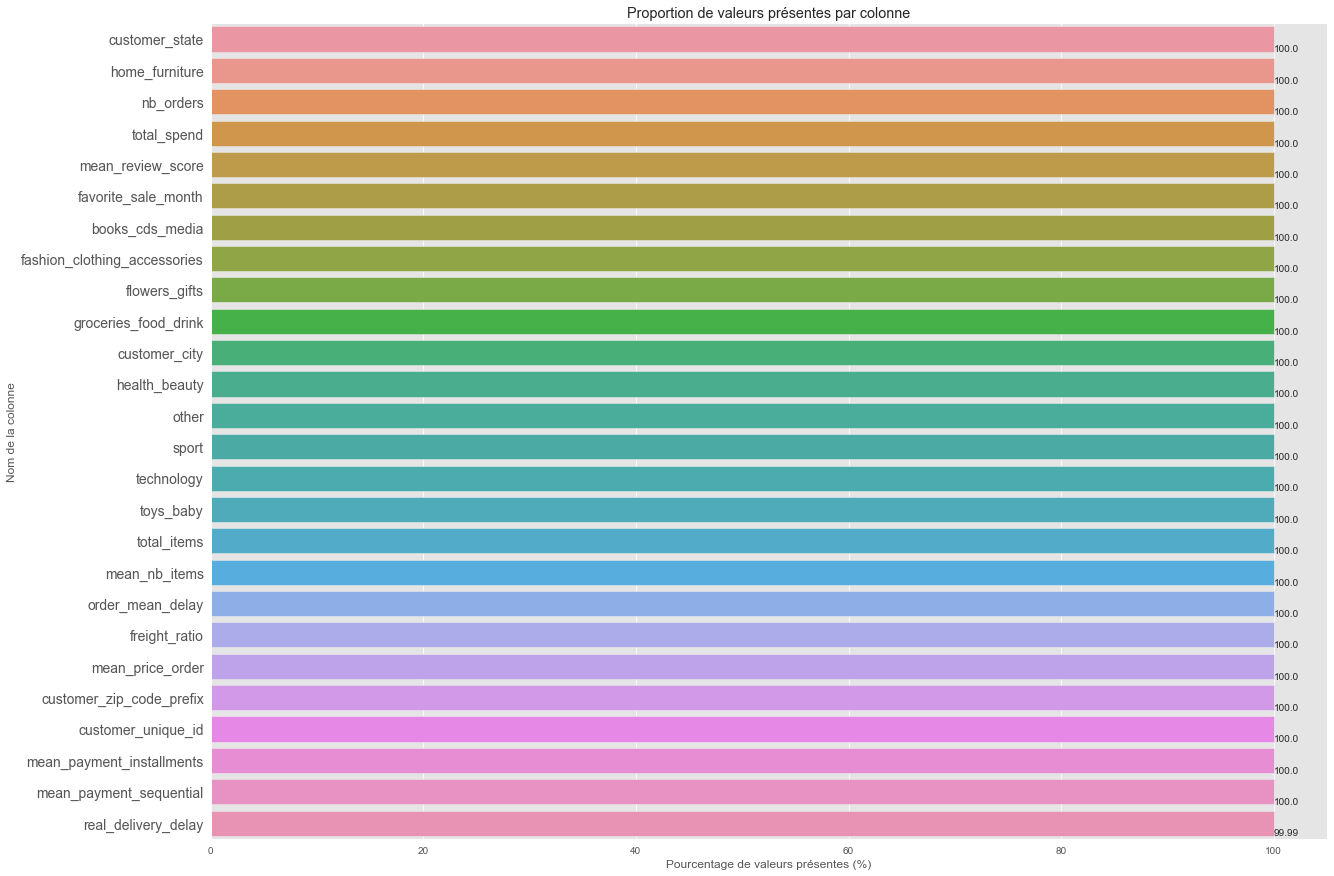

In [77]:
missing_presence(cust_data_master2, figsize=(20, 15))

In [78]:
cust_data_master3 = cust_data_master2.dropna(axis=0)

In [79]:
fast_dataset_info(cust_data_master3)

Le jeu de données contient 93349 lignes et 26 colonnes,  0 lignes dupliquées
Taux de valeurs manquantes :  
customer_state                  0.0
customer_city                   0.0
nb_orders                       0.0
total_spend                     0.0
mean_payment_sequential         0.0
mean_payment_installments       0.0
mean_review_score               0.0
real_delivery_delay             0.0
favorite_sale_month             0.0
books_cds_media                 0.0
fashion_clothing_accessories    0.0
flowers_gifts                   0.0
groceries_food_drink            0.0
health_beauty                   0.0
home_furniture                  0.0
other                           0.0
sport                           0.0
technology                      0.0
toys_baby                       0.0
total_items                     0.0
mean_nb_items                   0.0
order_mean_delay                0.0
freight_ratio                   0.0
mean_price_order                0.0
customer_zip_code_prefix    

In [80]:
cust_data_master3.describe()

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,real_delivery_delay,favorite_sale_month,books_cds_media,fashion_clothing_accessories,flowers_gifts,...,other,sport,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix
count,93349.000000,93349.000000,93349.000000,93349.000000,93349.000000,93349.000000,93349.000000,93349.000000,93349.000000,93349.000000,...,93349.000000,93349.000000,93349.000000,93349.000000,93349.000000,93349.000000,93349.000000,93349.000000,93349.000000,93349.000000
mean,1.033423,165.167826,1.043876,2.965991,4.140059,12.524346,6.032052,0.009075,0.034085,0.094400,...,0.133687,0.077023,0.152038,0.068447,1.180366,1.139523,232.504724,0.208151,137.506692,35245.517542
std,0.209107,226.301737,0.364452,2.717807,1.291957,9.549890,3.226203,0.094475,0.180044,0.290935,...,0.338171,0.265223,0.357666,0.251010,0.620856,0.527063,154.179358,0.124893,209.869107,29842.998754
min,1.000000,9.590000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.850000,1003.000000
25%,1.000000,63.010000,1.000000,1.000000,4.000000,7.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,108.000000,0.120000,46.000000,11410.000000
50%,1.000000,107.780000,1.000000,2.000000,5.000000,10.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,212.000000,0.180000,86.990000,24456.000000
75%,1.000000,182.510000,1.000000,4.000000,5.000000,16.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,342.000000,0.270000,149.900000,59076.000000
max,15.000000,13664.080000,26.000000,26.000000,5.000000,210.000000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,24.000000,21.000000,695.000000,0.960000,13440.000000,99980.000000


In [81]:
float_var = select_col_by_type(cust_data_master3,'float')
int_var = select_col_by_type(cust_data_master3,'int')
object_var = select_col_by_type(cust_data_master3,'object')
numerical = float_var + int_var

In [82]:
numerical

['total_spend',
 'mean_payment_sequential',
 'mean_payment_installments',
 'mean_review_score',
 'real_delivery_delay',
 'books_cds_media',
 'fashion_clothing_accessories',
 'flowers_gifts',
 'groceries_food_drink',
 'health_beauty',
 'home_furniture',
 'other',
 'sport',
 'technology',
 'toys_baby',
 'total_items',
 'mean_nb_items',
 'order_mean_delay',
 'freight_ratio',
 'mean_price_order',
 'nb_orders',
 'favorite_sale_month',
 'customer_zip_code_prefix']

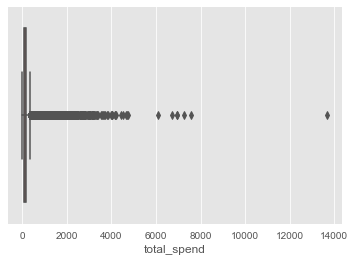

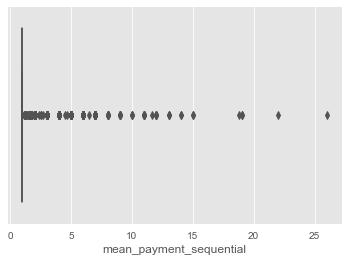

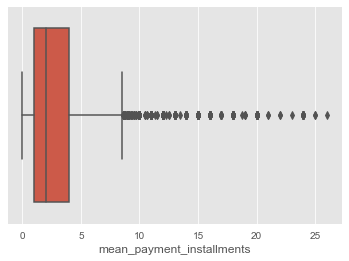

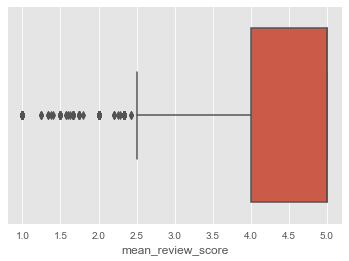

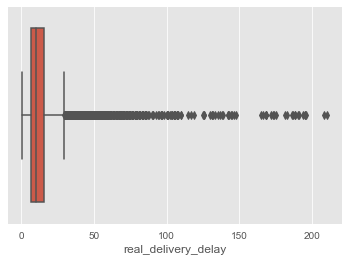

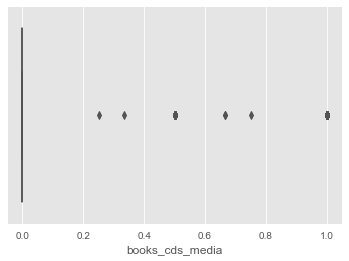

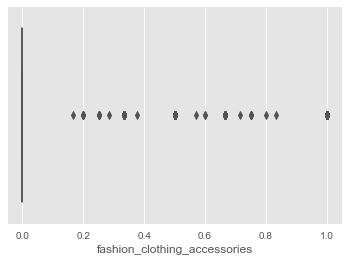

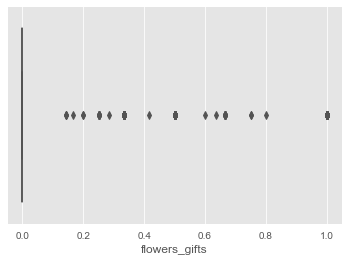

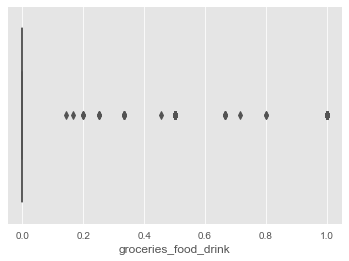

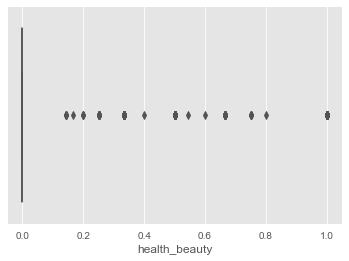

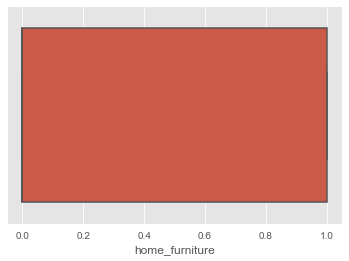

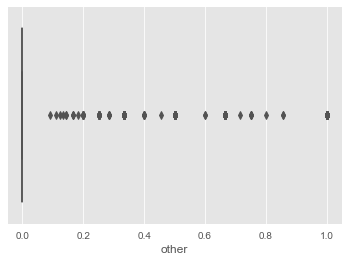

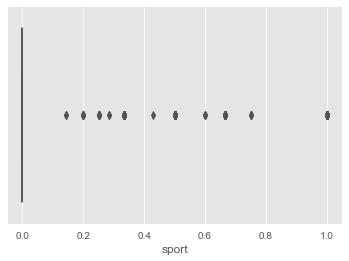

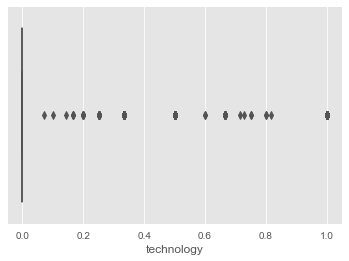

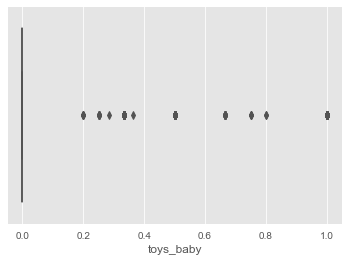

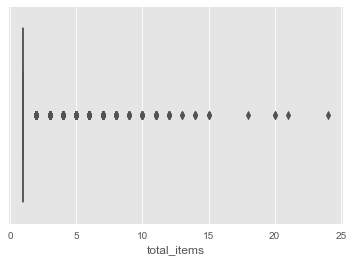

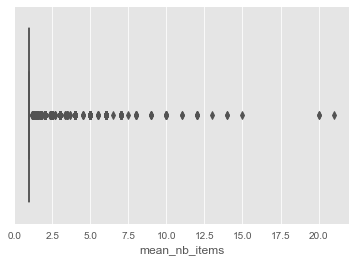

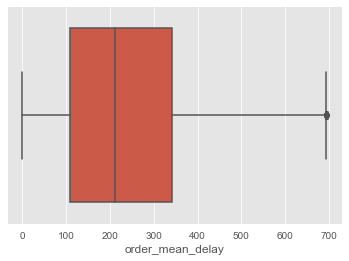

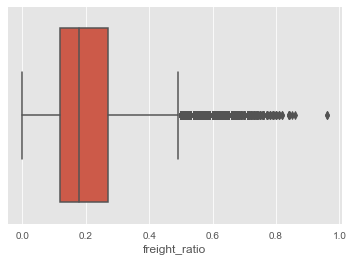

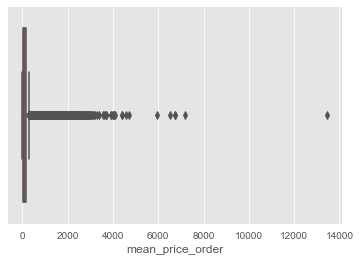

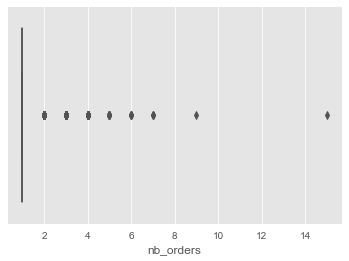

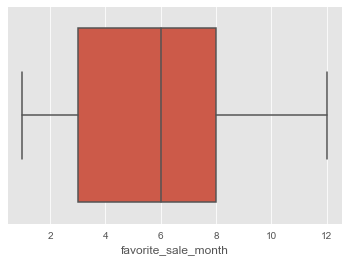

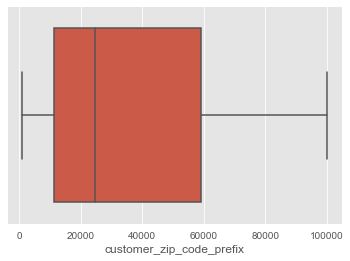

In [83]:
for col in numerical :
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=cust_data_master3[col])

In [84]:
cust_data_master3[cust_data_master3["mean_price_order"] == cust_data_master3["mean_price_order"].max()]

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,real_delivery_delay,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
3724,0a0a92112bd4c708ca5fde585afaa872,1,13664.08,1.0,1.0,1.0,18.0,9,0.0,0.0,...,1.0,0.0,8.0,8.0,334.0,0.02,13440.0,20080,rio de janeiro,RJ


In [85]:
# Cette commande contient 8 articles technologiques pour un montant de 13 000 dollars. 
# C'est atypique certes, mais ce n'est pas pour autant une donnée abérrante. Nous la conservons donc.
# Regardons la dispersion des montants moyen de commandes en fonction du nombre 
# d'articles pour tenter de repérer d'autres anomalies :

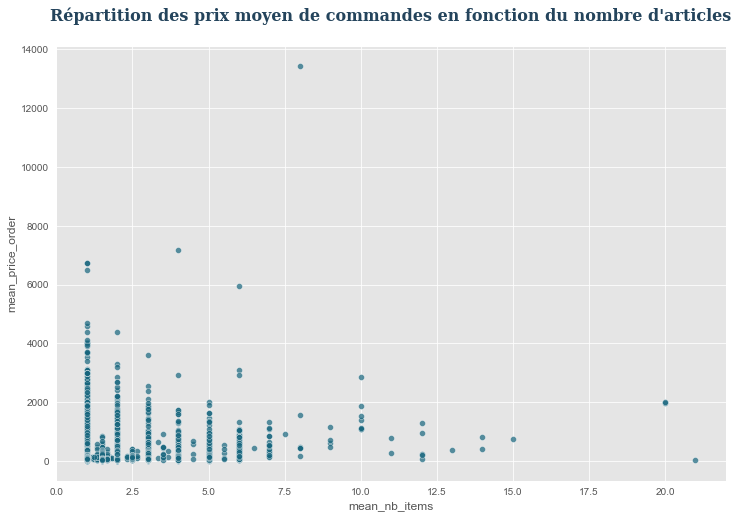

In [86]:
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(data=cust_data_master3, y="mean_price_order", x="mean_nb_items",
                color="#17657D", alpha=0.7)
plt.title(f"Répartition des prix moyen de commandes en fonction du nombre d'articles\n",
          fontdict=font_title, fontsize=16)
plt.show()

In [87]:
#Une commande de plus de 20 articles est affichée pour une somme de prêt de 0 :

cust_data_master3[cust_data_master3["mean_nb_items"] > 20]

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,real_delivery_delay,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
25309,4546caea018ad8c692964e3382debd19,1,196.17,1.0,2.0,1.0,15.0,7,0.0,0.0,...,0.0,0.0,21.0,21.0,409.0,0.84,31.8,5882,sao paulo,SP


In [88]:
#Les différents états du fichier client :
#Ici, nous allons regader d'où viennent les clients et si cette localisation a un impact sur les ventes.

In [89]:
cust_data_master3["customer_state"].unique()

array(['SP', 'SC', 'PA', 'PR', 'RJ', 'MA', 'ES', 'RS', 'MG', 'GO', 'DF',
       'BA', 'MT', 'SE', 'TO', 'PE', 'CE', 'AL', 'AC', 'PI', 'PB', 'RN',
       'AM', 'MS', 'AP', 'RO', 'RR'], dtype=object)

In [90]:
#Les codes états ne sont pas très parlant. Nous allons donc utiliser Wikipedia 
#pour modifier les codes états par leur nom :

In [91]:
wiki_url = "https://fr.wikipedia.org/wiki/%C3%89tats_du_Br%C3%A9sil"
states_table = pd.read_html(wiki_url)[1].set_index("Abréviation")
states_table.head(3)

,Drapeau,État,Capitale,Superficie (km²),Population (2014),Densité (2005),PIB (% du total) (2007),PIB en PPA (US$) (2007),IDH (2005),Alphabétisation (2003),Mortalité infantile (2002),Espérance de vie (2004)
Abréviation,,,,,,,,,,,,
AC,NaN,Acre,Rio Branco,"152 581,4",795 145,430,"5 761 000 (0,2 %)",8 789,751,84 %,"33,2‰",708
AL,NaN,Alagoas,Maceió,"27 767,7",3 327 551,10861,"17 793 000 (0,7 %)",5 858,677,70 %,"57,7‰",660
AP,NaN,Amapá,Macapá,"142 814,6",756 500,416,"6 022 000 (0,2 %)",10 254,780,91 %,"24,9‰",698


In [92]:
data_master = pd.merge(cust_data_master3.reset_index(), states_table[["État"]],
                how="left",
                left_on="customer_state",
                right_on="Abréviation")
data_master.drop("customer_state", axis=1, inplace=True)
data_master = data_master.rename(columns={"Etat": "customer_state"})

In [93]:
data_master

,index,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,real_delivery_delay,favorite_sale_month,books_cds_media,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,État
0,0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,0.0,...,0.0,0.0,1.0,1.0,111.0,0.08,129.90,7787,cajamar,São Paulo
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,0.0,...,0.0,0.0,1.0,1.0,114.0,0.30,18.90,6053,osasco,São Paulo
2,2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,0.0,...,0.0,0.0,1.0,1.0,537.0,0.20,69.00,88115,sao jose,Santa Catarina
3,3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,0.0,...,1.0,0.0,1.0,1.0,321.0,0.40,25.99,66812,belem,Pará
4,4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,0.0,...,1.0,0.0,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93344,93353,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,1.0,10.0,5.0,28.0,6,0.0,...,0.0,0.0,2.0,2.0,447.0,0.24,1570.00,55250,sanharo,Pernambuco
93345,93354,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1.0,1.0,4.0,30.0,12,0.0,...,0.0,1.0,1.0,1.0,262.0,0.23,64.89,44054,feira de santana,Bahia
93346,93355,ffff371b4d645b6ecea244b27531430a,1,112.46,1.0,1.0,5.0,15.0,2,0.0,...,0.0,0.0,1.0,1.0,568.0,0.20,89.90,78552,sinop,Mato Grosso
93347,93356,ffff5962728ec6157033ef9805bacc48,1,133.69,1.0,5.0,5.0,12.0,5,0.0,...,0.0,0.0,1.0,1.0,119.0,0.14,115.00,29460,bom jesus do norte,Espírito Santo


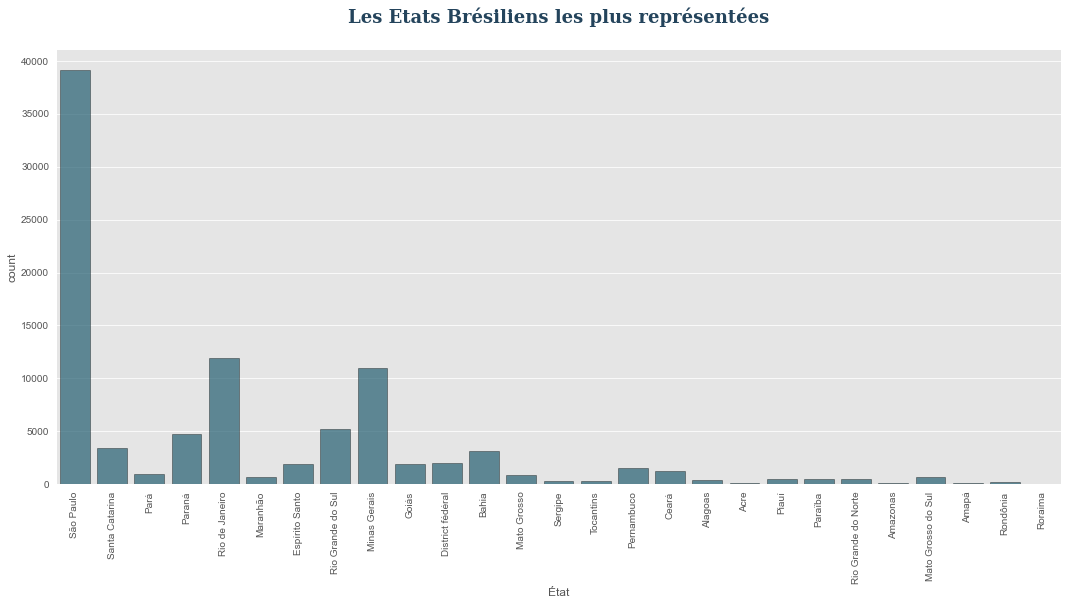

In [94]:
# Countplot of states repartition
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=data_master, x="État",
              edgecolor="black",
              color="#17657D", alpha=0.7)
plt.xticks(range(0, data_master["État"].nunique()),
           data_master["État"].unique(),
           rotation=90)
plt.title(f"Les Etats Brésiliens les plus représentées\n",
          fontdict=font_title)
plt.show()


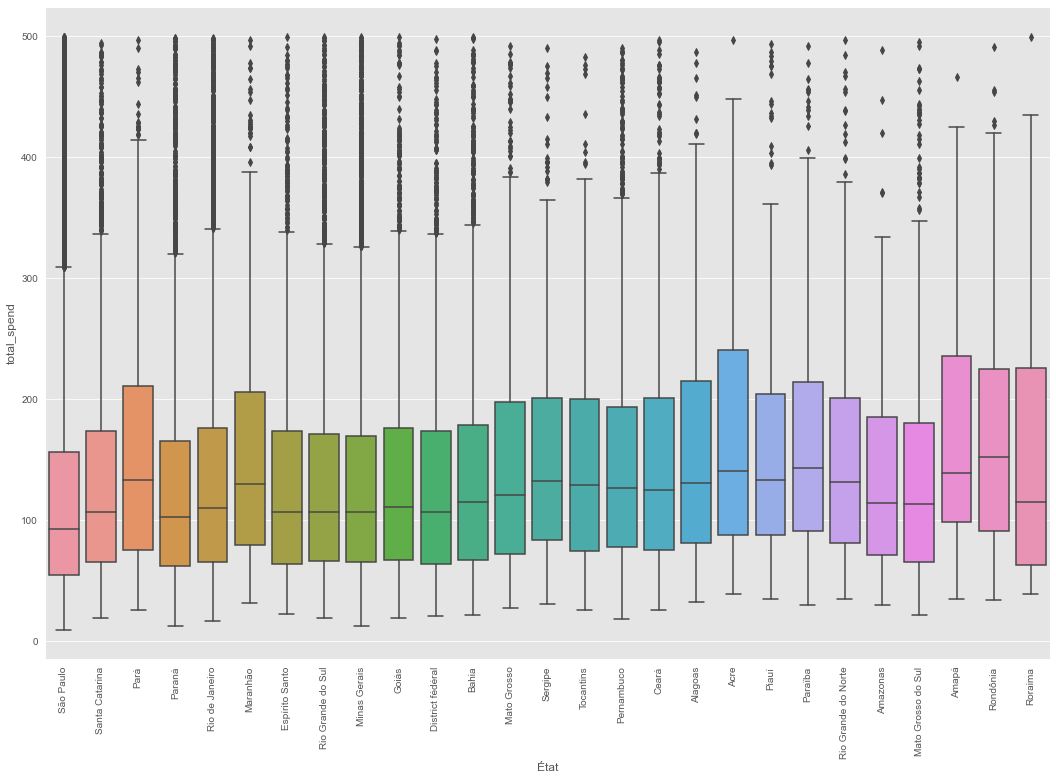

In [95]:
# Boxplots of total spend by state
fig = plt.figure(figsize=(18,12))
sns.boxplot(x="État", y="total_spend", 
            data=data_master[data_master["total_spend"]<500])
plt.xticks(rotation=90)
plt.show()

In [96]:
# Corrélations:
# Nous allons à présent regarder s'il existe des corrélations linéaires fortes dans le jeu de données:

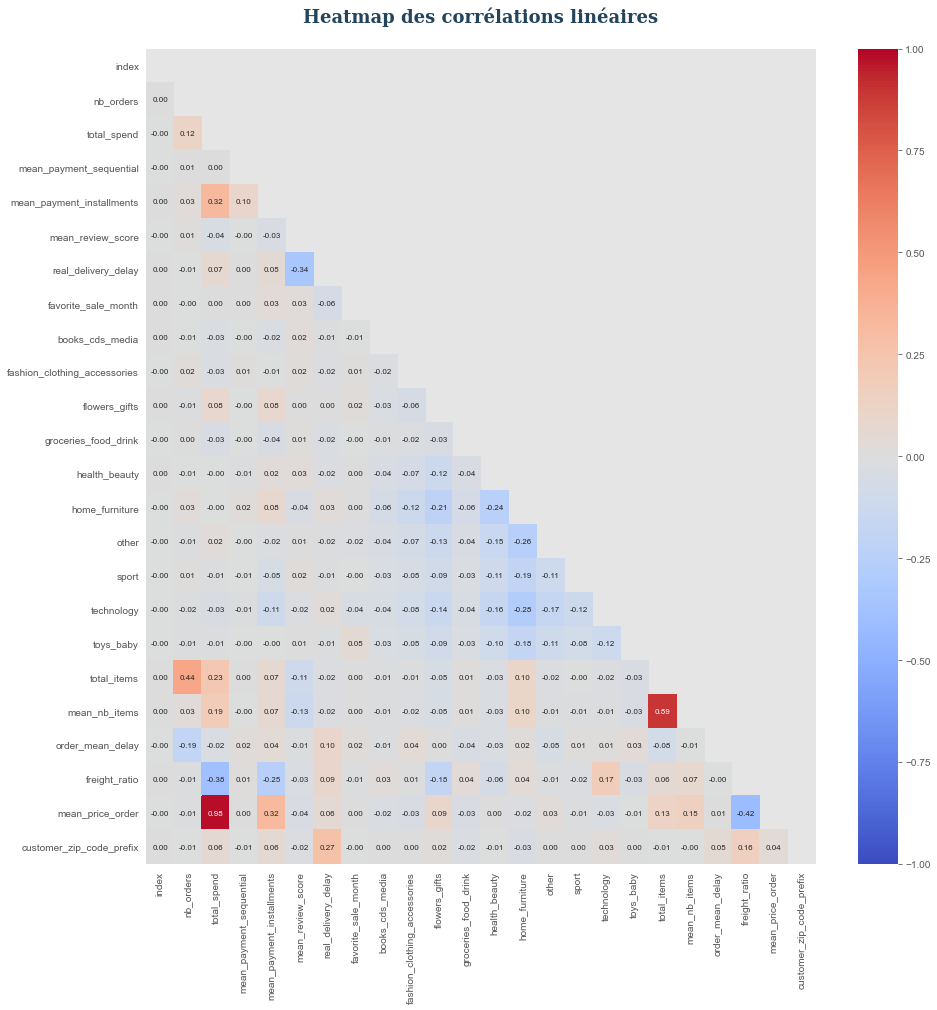

In [97]:
corr = data_master.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

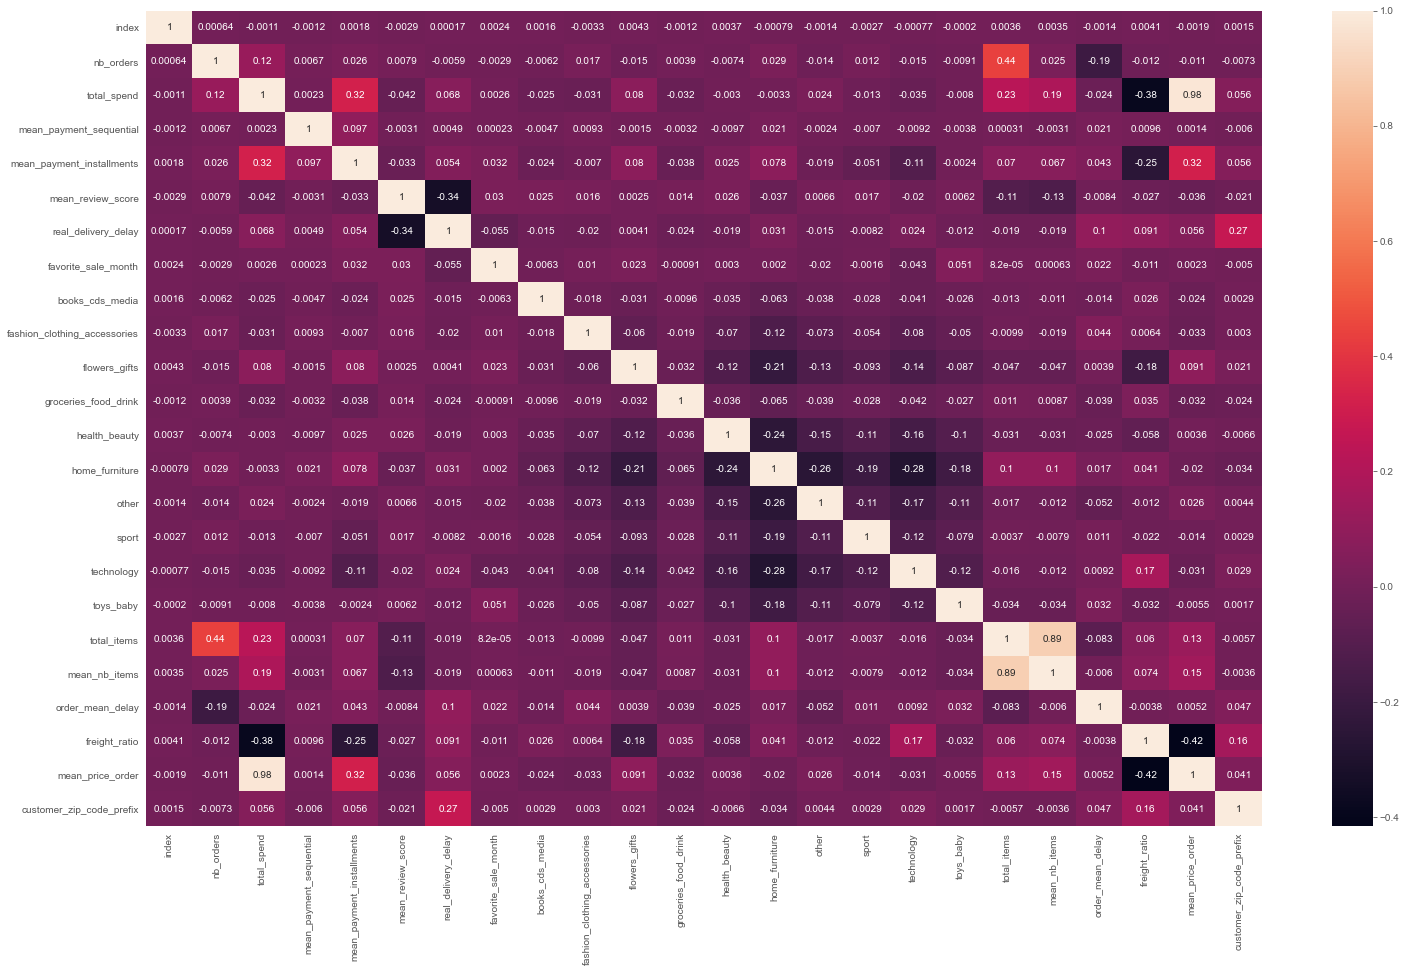

In [98]:
corr_df = data_master.corr()
# plot the heatmap
plt.figure(figsize=(25,15))
sns.heatmap(corr_df, 
        xticklabels=corr_df.columns,
        yticklabels=corr_df.columns, annot=True)

In [99]:
correlated_features = set()
correlation_matrix = corr_df

In [100]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'mean_nb_items', 'mean_price_order'}


In [101]:
data_master = data_master.drop(["customer_zip_code_prefix",
                                "customer_city",
                                "État",
                                "mean_price_order",
                                "mean_nb_items"], axis=1)

In [102]:
data_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93349 entries, 0 to 93348
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         93349 non-null  int64  
 1   customer_unique_id            93349 non-null  object 
 2   nb_orders                     93349 non-null  int64  
 3   total_spend                   93349 non-null  float64
 4   mean_payment_sequential       93349 non-null  float64
 5   mean_payment_installments     93349 non-null  float64
 6   mean_review_score             93349 non-null  float64
 7   real_delivery_delay           93349 non-null  float64
 8   favorite_sale_month           93349 non-null  int64  
 9   books_cds_media               93349 non-null  float64
 10  fashion_clothing_accessories  93349 non-null  float64
 11  flowers_gifts                 93349 non-null  float64
 12  groceries_food_drink          93349 non-null  float64
 13  h

In [103]:
data_master[['real_delivery_delay','order_mean_delay' ]]

,real_delivery_delay,order_mean_delay
0,6.0,111.0
1,3.0,114.0
2,26.0,537.0
3,20.0,321.0
4,13.0,288.0
...,...,...
93344,28.0,447.0
93345,30.0,262.0
93346,15.0,568.0
93347,12.0,119.0


In [104]:
data_master.to_csv(data_path + "olist-customers-segm_EDA.csv")